In [2]:
import numpy as np
import imageio
import glob
from skimage.transform import resize, rotate
from skimage.util import random_noise
import random
import os

TRAIN_PATH = r"E:\数据集\山体滑坡数据集\landslide\image\*.png"
TRAIN_MASK = r"E:\数据集\山体滑坡数据集\landslide\mask\*.png"
TRAIN_DEM = r"E:\\数据集\\山体滑坡数据集\\landslide\\dem\\*.png"
OUTPUT_DIR = r"E:\数据集\augmented_output"

os.makedirs(OUTPUT_DIR, exist_ok=True)

all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))
all_dem = sorted(glob.glob(TRAIN_DEM))

# 处理图像和掩码
for i, (img_path, mask_path) in enumerate(zip(all_train, all_mask)):
    # 读取RGB图像并调整大小
    data = imageio.imread(img_path)
    data = resize(data, (256, 256), anti_aliasing=True)
    
    # 读取掩码并调整大小
    mask_data = imageio.imread(mask_path)
    mask_data = resize(mask_data, (256, 256), anti_aliasing=True)

    for j in range(3):  # 增强3次
        # 随机翻转
        if random.random() > 0.5:
            data = np.flipud(data)
            mask_data = np.flipud(mask_data)

        # 随机旋转
        angle = random.choice([0, 90, 180, 270])
        data = rotate(data, angle)
        mask_data = rotate(mask_data, angle)

        # 添加噪声
        data = random_noise(data, mode='gaussian', var=0.01)

        # 保存增强后的RGB图像
        augmented_img_path = os.path.join(OUTPUT_DIR, f"augmented_img_{i}_{j}.png")
        imageio.imwrite(augmented_img_path, (data * 255).astype(np.uint8))  # 转换为0-255范围

        # 保存增强后的掩码
        augmented_mask_path = os.path.join(OUTPUT_DIR, f"augmented_mask_{i}_{j}.png")
        imageio.imwrite(augmented_mask_path, (mask_data * 255).astype(np.uint8))  # 转换为0-255范围

# 处理DEM数据并保存
for i, dem_file in enumerate(all_dem):
    dem_data = imageio.imread(dem_file)
    dem_data = resize(dem_data, (256, 256), anti_aliasing=True)

    # 计算高程、坡度、坡向和曲率
    elevation = dem_data.astype(float)

    # 计算坡度
    gradient_x, gradient_y = np.gradient(elevation)  # 获取两个方向的梯度
    slope = np.sqrt(gradient_x**2 + gradient_y**2)  # 计算坡度

    # 计算坡向
    aspect = np.arctan2(gradient_y, gradient_x)  # 计算坡向（弧度）
    aspect = np.degrees(aspect)  # 转换为度
    aspect[aspect < 0] += 360  # 将负值转为正值

    # 计算曲率
    gradient_xx, gradient_xy = np.gradient(gradient_x)
    gradient_yx, gradient_yy = np.gradient(gradient_y)
    curvature = gradient_xx + gradient_yy  # 简单曲率计算

    for j in range(len(all_train) * 3):  # 针对每个增强的图像
        # 组合并保存DEM特征图像
        augmented_dem_path = os.path.join(OUTPUT_DIR, f"augmented_dem_{i}_{j}.png")
        combined_features = np.clip(np.stack([
            elevation / np.max(elevation),
            slope / np.max(slope),
            aspect / 360.0,
            curvature / np.max(curvature)
        ], axis=-1), 0, 1)
        imageio.imwrite(augmented_dem_path, (combined_features * 255).astype(np.uint8))

print("数据增强完成，增强后的图像已保存。")



C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_18320\430051169.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imageio.imread(img_path)
C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_18320\430051169.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_data = imageio.imread(mask_path)
C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_18320\430051169.py:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.im

KeyboardInterrupt: 

In [5]:
import numpy as np
import imageio
import glob
from skimage.transform import resize, rotate
from skimage.util import random_noise
import random

TRAIN_PATH = r"E:\数据集\山体滑坡数据集\landslide\image\*.png"
TRAIN_MASK = r"E:\数据集\山体滑坡数据集\landslide\mask\*.png"
TRAIN_DEM = r"E:\\数据集\\山体滑坡数据集\\landslide\\dem\\*.png"
TRAIN_XX = []
TRAIN_YY = []

all_train = sorted(glob.glob(TRAIN_PATH))
all_dem = sorted(glob.glob(TRAIN_DEM))
all_mask = sorted(glob.glob(TRAIN_MASK))

# 处理图像和掩码
for i, (img_path, mask_path) in enumerate(zip(all_train, all_mask)):
    # 读取RGB图像并调整大小
    data = imageio.imread(img_path)
    data = resize(data, (256, 256), anti_aliasing=True)
    
    # 读取掩码并调整大小
    mask_data = imageio.imread(mask_path)
    mask_data = resize(mask_data, (256, 256), anti_aliasing=True)

    for _ in range(1):  # 增强3次
        # 随机翻转
        if random.random() > 0.5:
            data = np.flipud(data)
            mask_data = np.flipud(mask_data)

        # 随机旋转
        angle = random.choice([0, 90, 180, 270])
        data = rotate(data, angle)
        mask_data = rotate(mask_data, angle)

        # 添加噪声
        data = random_noise(data, mode='gaussian', var=0.01)

        # 添加增强后的数据
        TRAIN_XX.append(data)
        TRAIN_YY.append(mask_data)

# 处理DEM数据并添加到增强数据集
for i, dem_file in enumerate(all_dem):
    dem_data = imageio.imread(dem_file)
    dem_data = resize(dem_data, (256, 256), anti_aliasing=True)

    dem_data = dem_data.astype(float)  # Ensure dem_data is a float array
    for j in range(len(TRAIN_XX)):
        # 计算高程、坡度、坡向和曲率
        elevation = dem_data
        gradients = np.gradient(elevation)

        # 计算坡度
        slope = np.sqrt(gradients[0]**2 + gradients[1]**2)

        # 计算坡向
        aspect = np.degrees(np.arctan2(gradients[1], gradients[0]))
        aspect[aspect < 0] += 360
        
        # 计算曲率
        curvature = np.gradient(gradients[0])[0] + np.gradient(gradients[1])[1]  # Example for curvature
        
        # Normalize curvature
        curvature = curvature / np.max(curvature) if np.max(curvature) != 0 else curvature

        # 将特征组合到增强数据集中
        TRAIN_XX[j] = np.concatenate([
            TRAIN_XX[j][..., :3],  # RGB
            elevation / np.max(elevation)[..., np.newaxis],
            slope / np.max(slope)[..., np.newaxis],
            aspect / 360.0,
            curvature[..., np.newaxis]  # Ensure curvature is added as an additional channel
        ], axis=-1)

# 转换为numpy数组
TRAIN_XX = np.array(TRAIN_XX)
TRAIN_YY = np.array(TRAIN_YY)

# 保存增强后的数据集
np.save("augmented_train_xx.npy", TRAIN_XX)
np.save("augmented_train_yy.npy", TRAIN_YY)

print("数据增强完成，增强后的数据集已保存。")


C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_23648\4259726754.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imageio.imread(img_path)
C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_23648\4259726754.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_data = imageio.imread(mask_path)
C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_23648\4259726754.py:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [5]:
import numpy as np
import imageio
import glob
from skimage.transform import resize, rotate
import random
from skimage import util

# 路径定义
TRAIN_PATH = r"E:\数据集\山体滑坡数据集\landslide\image\*.png"
TRAIN_MASK = r"E:\数据集\山体滑坡数据集\landslide\mask\*.png"
TRAIN_DEM = r"E:\\数据集\\山体滑坡数据集\\landslide\\dem\\*.png"
TRAIN_XX = np.zeros((770, 256, 256, 7))  # 更新为7个特征
TRAIN_YY = np.zeros((770, 256, 256, 1))

# 读取所有文件路径
all_train = sorted(glob.glob(TRAIN_PATH))
all_dem = sorted(glob.glob(TRAIN_DEM))
all_mask = sorted(glob.glob(TRAIN_MASK))

# 数据增强函数
def augment_image(image, mask):
    if random.random() > 0.5:
        image = np.fliplr(image)
        mask = np.fliplr(mask)
    
    if random.random() > 0.5:
        image = np.flipud(image)
        mask = np.flipud(mask)

    angle = random.randint(-15, 15)
    image = rotate(image, angle, mode='edge')
    mask = rotate(mask, angle, mode='edge')

    return image, mask

# 处理图像和掩码
for i, (img_path, mask_path) in enumerate(zip(all_train, all_mask)):
    # 读取RGB图像并调整大小
    data = imageio.imread(img_path)
    data = resize(data, (256, 256), anti_aliasing=True)
    data[np.isnan(data)] = 0.000001
    
    # 提取RGB特征并归一化
    TRAIN_XX[i, :, :, 0] = data[:, :, 0] / 255.0  # RED
    TRAIN_XX[i, :, :, 1] = data[:, :, 1] / 255.0  # GREEN
    TRAIN_XX[i, :, :, 2] = data[:, :, 2] / 255.0  # BLUE

    # 读取掩码并调整大小
    mask_data = imageio.imread(mask_path)
    mask_data = resize(mask_data, (256, 256), anti_aliasing=True)

    # 应用数据增强
    data, mask_data = augment_image(data, mask_data)
    
    TRAIN_YY[i, :, :, 0] = mask_data

# 处理DEM数据
for i, dem_file in enumerate(all_dem):
    dem_data = imageio.imread(dem_file)  # 读取DEM图像
    dem_data = resize(dem_data, (256, 256), anti_aliasing=True)  # 调整为256x256
    
    # 计算高程
    elevation = dem_data.astype(float)  # 高程数据
    TRAIN_XX[i, :, :, 3] = elevation / np.max(elevation)  # 高程归一化

    # 计算坡度
    gradient_x, gradient_y = np.gradient(elevation)  # 计算梯度
    slope = np.sqrt(gradient_x**2 + gradient_y**2)  # 计算坡度
    TRAIN_XX[i, :, :, 4] = slope / np.max(slope)  # SLOPE 归一化
    
    # 计算坡向
    aspect = np.arctan2(gradient_y, gradient_x)  # 计算坡向（弧度）
    aspect = np.degrees(aspect)  # 转换为度
    aspect[aspect < 0] += 360  # 将负值转为正值
    TRAIN_XX[i, :, :, 5] = aspect / 360.0  # ASPECT 归一化到[0, 1]

    # 计算曲率
    gradient_xx, gradient_xy = np.gradient(gradient_x)
    gradient_yx, gradient_yy = np.gradient(gradient_y)
    curvature = gradient_xx + gradient_yy  # 简单曲率计算
    TRAIN_XX[i, :, :, 6] = curvature / np.max(curvature)  # CURVATURE 归一化

# 处理缺失值
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001 
TRAIN_XX = TRAIN_XX[:1500]
TRAIN_YY = TRAIN_YY[:1500]


C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_3004\1977516732.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imageio.imread(img_path)
C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_3004\1977516732.py:49: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_data = imageio.imread(mask_path)
C:\Users\龙儿璨\AppData\Local\Temp\ipykernel_3004\1977516732.py:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.im

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#划分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

In [6]:
import tensorflow as tf
from tensorflow.keras import backend as K
# recall
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#unet模型
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))
    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model
IMG_WIDTH = 256 # 图像宽度
IMG_HEIGHT = 256 # 图像高度
IMG_CHANNELS =7  # 图像通道数
model = unet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)


print(model.output_shape)


# 打印模型概要
model.summary()



(None, 256, 256, 1)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 7)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 256, 256,  │      1,024 │ input_layer_5[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 256, 256,  │          0 │ conv2d_95[0][0]   │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 256, 256,  │      2,320 │ dropout_45[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 128, 128,  │          0 │ conv2d_96[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 128, 128,  │      4,640 │ max_pooling2d_20… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_46          │ (None, 128, 128,  │          0 │ conv2d_97[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 128, 128,  │      9,248 │ dropout_46[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 64, 64,    │          0 │ conv2d_98[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_21… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_47          │ (None, 64, 64,    │          0 │ conv2d_99[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 64, 64,    │     36,928 │ dropout_47[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 32, 32,    │          0 │ conv2d_100[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 32, 32,    │     73,856 │ max_pooling2d_22… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 32, 32,    │          0 │ conv2d_101[0][0]  │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 32, 32,    │    147,584 │ dropout_48[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_23    │ (None, 16, 16,    │          0 │ conv2d_102[0][0]

 Total params: 1,941,681 (7.41 MB)

 Trainable params: 1,941,681 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.00000, saving model to best_model.keras
39/39 - 53s - 1s/step - accuracy: 0.8432 - f1_m: 0.0181 - loss: 0.3872 - precision_m: 0.0164 - recall_m: 0.0574 - val_accuracy: 0.8904 - val_f1_m: 0.0000e+00 - val_loss: 0.2353 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100

Epoch 2: val_f1_m did not improve from 0.00000
39/39 - 46s - 1s/step - accuracy: 0.8910 - f1_m: 1.3698e-06 - loss: 0.2295 - precision_m: 0.0011 - recall_m: 6.8539e-07 - val_accuracy: 0.8904 - val_f1_m: 0.0000e+00 - val_loss: 0.2257 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100

Epoch 3: val_f1_m did not improve from 0.00000
39/39 - 46s - 1s/step - accuracy: 0.8910 - f1_m: 4.6255e-07 - loss: 0.2133 - precision_m: 0.0128 - recall_m: 2.3128e-07 - val_accuracy: 0.8904 - val_f1_m: 0.0000e+00 - val_loss: 0.2021 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100

Epoch 4: val_f1_m did not improve from 0.00000
39/39 -

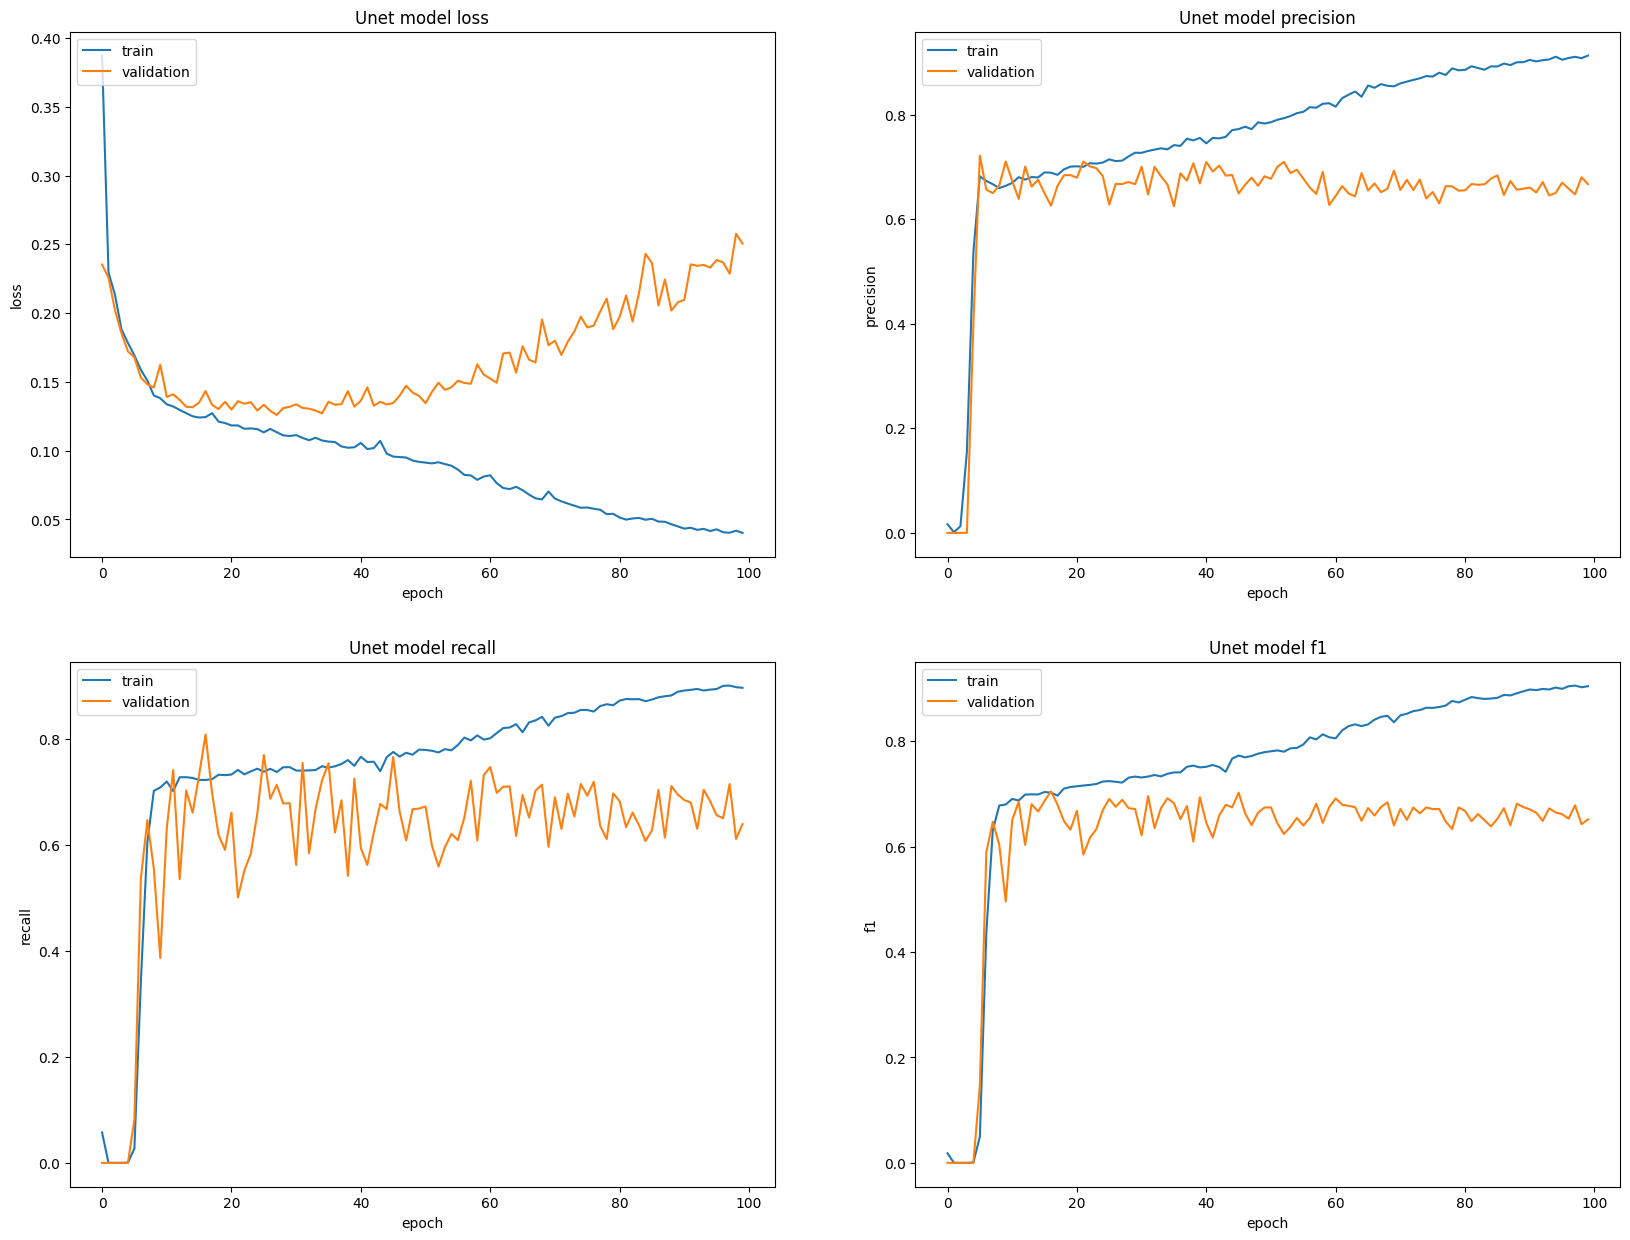

In [4]:
model = unet_model(256, 256, 7)
#回调函数
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
callbacks = [checkpointer]
history = model.fit(x_train, y_train, batch_size=16,
          epochs=100,
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)
model.save("model_save.keras")
#计算评价指标
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print('loss:',loss)
print('accuracy:',accuracy)
print('f1_score:',f1_score)
print('precision:',precision)
print('recall:',recall)

fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step


Text(0.5, 1.0, 'Training Image')

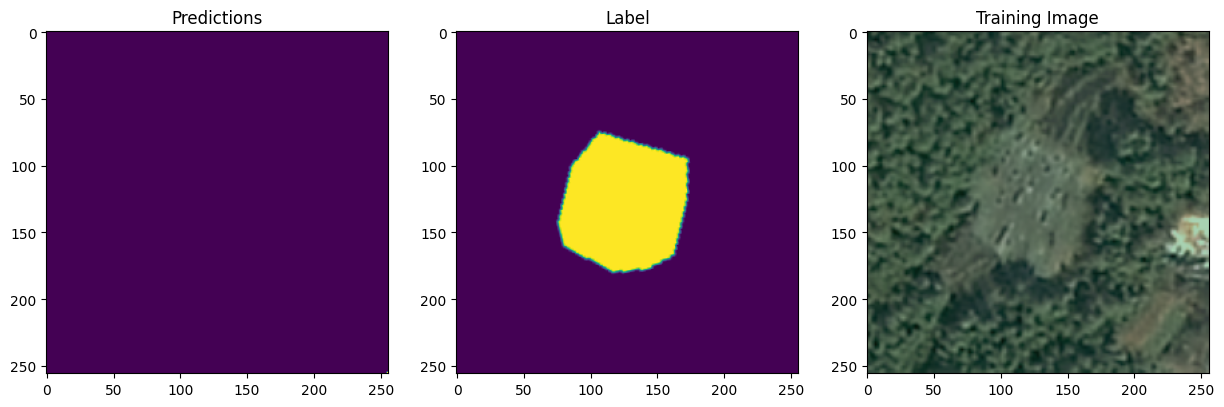

In [16]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)
#选择第77个样本进行可视化
img = 71
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3]*255)
ax3.set_title('Training Image')

In [16]:
import numpy as np
import cv2

# 读取标签图像
label_image = cv2.imread('E:\\数据集\\山体滑坡数据集\\landslide\\mask\\df002.png', cv2.IMREAD_GRAYSCALE)


# 检查是否成功加载图像
if label_image is None:
    print("Failed to load image. Please check the file path and image format.")
else:
    print("Image loaded successfully.")
# 统计像素值
unique_values = np.unique(label_image)
print('Unique pixel values in label image:', unique_values)

# 检查像素值范围
# min_value = label_image.min()
# max_value = label_image.max()

# print(f'Minimum pixel value: {min_value}, Maximum pixel value: {max_value}')



Failed to load image. Please check the file path and image format.
Unique pixel values in label image: [None]


In [17]:
import os

# 检查文件路径
file_path = 'E:\\数据集\\山体滑坡数据集\\landslide\\mask\\df002.png'
if not os.path.exists(file_path):
    print(f"File {file_path} does not exist. Please provide a valid file path.")
else:
    print("File exists, proceeding with image loading...")

    # 尝试读取图像
    label_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    if label_image is None:
        print("Failed to load the image. Please ensure it is in the correct format and not corrupted.")
    else:
        print("Image loaded successfully. Now checking pixel values...")
        # 检查唯一像素值
        unique_values = np.unique(label_image)
        print('Unique pixel values in label image:', unique_values)

File exists, proceeding with image loading...
Failed to load the image. Please ensure it is in the correct format and not corrupted.


In [19]:
from PIL import Image
import numpy as np

file_path = 'E:/数据集/山体滑坡数据集/landslide/mask/df002.png'

try:
    with Image.open(file_path) as img:
        print(f"Image format: {img.format}")
        img.show()  # 显示图像以确认是否成功加载
except Exception as e:
    print(f"Failed to load the image using Pillow. Error: {e}")

# 将图像转换为 numpy 数组并计算唯一像素值
try:
    label_image = np.array(img)
    unique_values = np.unique(label_image)
    print('Unique pixel values in label image:', unique_values)
except Exception as e:
    print(f"Failed to process the image data. Error: {e}")



    

Image format: PNG
Unique pixel values in label image: [  0 255]


In [12]:
import cv2
import numpy as np
from PIL import Image

def change_background_to_white(input_image_path, output_image_path):
    # 读取图片
    image = cv2.imread(input_image_path)
    
    # 检查图像是否成功读取
    if image is None:
        print("Error: Unable to read image.")
        return
    
    # 转换为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 使用自适应阈值处理来创建一个二进制图像
    binary_mask = cv2.adaptiveThreshold(gray, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 
                                        11, 2)

    # 找到轮廓
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 创建一个白色背景的图像
    white_background = np.ones_like(image) * 255

    # 检查是否找到轮廓
    if contours:
        # 在白色背景上绘制轮廓
        cv2.drawContours(white_background, contours, -1, (0, 0, 0), thickness=cv2.FILLED)

        # 生成最终图像，将前景对象放置在白色背景上
        final_image = np.where(white_background == 255, white_background, image)

        # 保存结果
        output_image = Image.fromarray(final_image)
        output_image.save(output_image_path)
        print("Background changed to white and saved to:", output_image_path)
    else:
        print("No foreground detected in the image.")

# 使用示例
input_image = 'cb.jpg'  # 输入图片路径
output_image = 'output_image.png'  # 输出图片路径
change_background_to_white(input_image, output_image)


Background changed to white and saved to: output_image.png


In [11]:
import cv2
import numpy as np
from PIL import Image

def change_background_to_white(input_image_path, output_image_path):
    # 读取图片
    image = cv2.imread(input_image_path)

    # 检查图像是否成功读取
    if image is None:
        print("Error: Unable to read image.")
        return

    # 转换为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 使用自适应阈值处理来创建一个二进制图像
    binary_mask = cv2.adaptiveThreshold(gray, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)

    # 应用形态学操作去噪
    kernel = np.ones((3, 3), np.uint8)  # 定义结构元素
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)  # 闭运算
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)   # 开运算

    # 找到轮廓
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 创建一个白色背景的图像
    white_background = np.ones_like(image) * 255

    # 检查是否找到轮廓
    if contours:
        # 过滤小轮廓
        min_contour_area = 100  # 设置最小轮廓面积阈值
        for contour in contours:
            if cv2.contourArea(contour) >= min_contour_area:
                cv2.drawContours(white_background, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)

        # 生成最终图像，将前景对象放置在白色背景上
        final_image = np.where(white_background == 255, white_background, image)

        # 保存结果
        output_image = Image.fromarray(final_image)
        output_image.save(output_image_path)
        print("Background changed to white and saved to:", output_image_path)
    else:
        print("No foreground detected in the image.")

# 使用示例
input_image = 'cb.jpg'  # 输入图片路径
output_image = 'output_image.png'  # 输出图片路径
change_background_to_white(input_image, output_image)


Background changed to white and saved to: output_image.png


In [9]:
import cv2
import numpy as np
from PIL import Image

def change_background_to_white(input_image_path, output_image_path):
    # 读取图片
    image = cv2.imread(input_image_path)

    # 检查图像是否成功读取
    if image is None:
        print("Error: Unable to read image.")
        return

    # 转换为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 使用自适应阈值处理来创建一个二进制图像
    # 调整参数以保留字体细节
    binary_mask = cv2.adaptiveThreshold(gray, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 15, 10)

    # 找到轮廓
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 创建一个白色背景的图像
    white_background = np.ones_like(image) * 255

    # 检查是否找到轮廓
    if contours:
        # 过滤小轮廓
        min_contour_area = 30  # 减小最小轮廓面积阈值
        for contour in contours:
            if cv2.contourArea(contour) >= min_contour_area:
                # 绘制轮廓，确保字体细节保留
                cv2.drawContours(white_background, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)

        # 生成最终图像，将前景对象放置在白色背景上
        final_image = np.where(white_background == 255, white_background, image)

        # 保存结果
        output_image = Image.fromarray(final_image)
        output_image.save(output_image_path)
        print("Background changed to white and saved to:", output_image_path)
    else:
        print("No foreground detected in the image.")

# 使用示例
input_image = 'cb.jpg'  # 输入图片路径
output_image = 'output_image.png'  # 输出图片路径
change_background_to_white(input_image, output_image)


Background changed to white and saved to: output_image.png
